In [4]:
%%bash 
pwd

/home/mcditoos/Desktop/DatosGerardo2


In [5]:
import pandas as pd

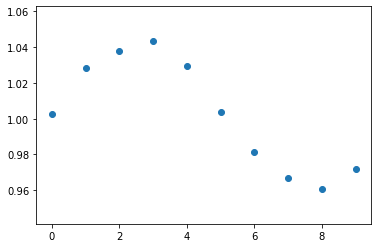

In [6]:
import natsort
from glob import glob
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/11/gerardo*.DAT')

filenames=natsort.natsorted(filenames)
filenames

import numpy as np

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    lista=C.columns
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias11=Coincidencias[1:]/Coincidencias[0]

import matplotlib.pyplot as plt

plt.scatter(range(10),coincidencias11)

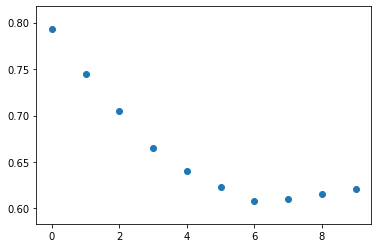

In [7]:
import natsort
from glob import glob
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/12/gerardo*.DAT')

filenames=natsort.natsorted(filenames)
filenames

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias12=Coincidencias[4:]/Coincidencias[3]

plt.scatter(range(10),coincidencias12)



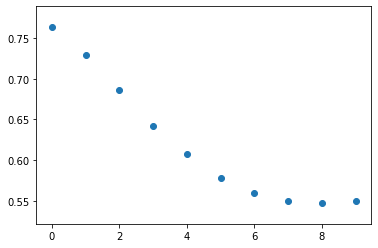

In [8]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/21/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias21=Coincidencias[1:]/Coincidencias[0]

plt.scatter(range(10),coincidencias21)




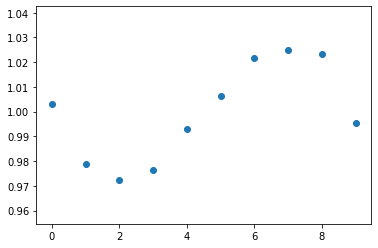

In [9]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/22/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias22=Coincidencias[2:]/Coincidencias[1]

plt.scatter(range(10),coincidencias22)

In [10]:
from sympy import *

In [11]:
gamma1,gamma2,beta,theta=symbols('gamma1 gamma2 beta theta',real=True)
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=Symbol('theta1',real=True)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista
def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[0,exp(I*gamma2)],[exp(I*gamma1),0]])
    objeto=Matrix([[ 1,0],[0,beta]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*objeto*K[i]*r)
    else:
        r=K*(M1*objeto*K)**(N-1)*r
    return r
        
def N_Interferomemer(N,k):
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [12]:
pabs,pd1,pd2,K=N_Interferomemer(2,1)

In [13]:
pd1=simplify(pd1.subs({K[1]:pi/4,K[2]:pi/4,beta:cos(theta)}))
pd1

cos(theta)**2/4 + cos(theta)*cos(gamma1 - gamma2)/2 + 1/4

In [14]:
valores=[0,np.pi/18,np.pi/9,np.pi/6,40*np.pi/180,50*np.pi/180,np.pi/3,7*np.pi/18,8*np.pi/18,np.pi/2]
#data=np.array([])
#for i in valores:
    #nuevo=pd1.subs({theta:i})
    #data=np.append(data,nuevo)
valores

[0,
 0.17453292519943295,
 0.3490658503988659,
 0.5235987755982988,
 0.6981317007977318,
 0.8726646259971648,
 1.0471975511965976,
 1.2217304763960306,
 1.3962634015954636,
 1.5707963267948966]

In [15]:
f = lambdify([theta, gamma1, gamma2], pd1)

Parameters [1.19934683 0.34482205]
RMSE: 0.17656790723320745
R-squared: -5.505517897039463


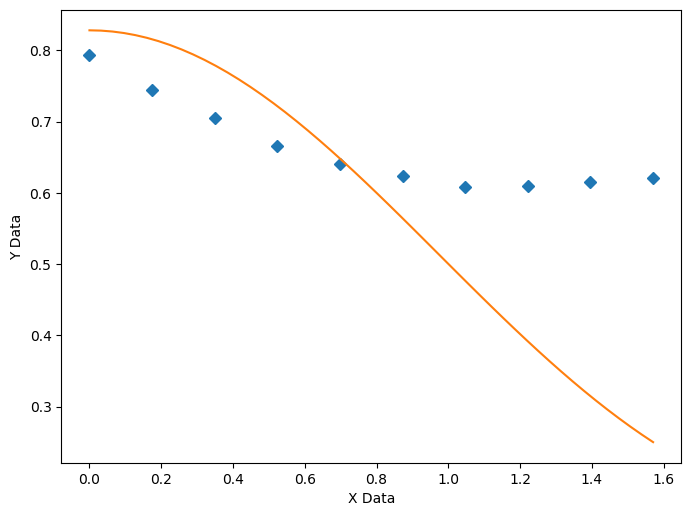

In [16]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias12


def func(x, gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f(x,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [17]:
pd2=simplify(pd2.subs({K[1]:pi/4,K[2]:pi/4,beta:cos(theta)}))
f2 = lambdify([theta, gamma1, gamma2], pd2)
pd2

cos(theta)**2/4 - cos(theta)*cos(gamma1 - gamma2)/2 + 1/4

Parameters [113.4282665  110.28667385]
RMSE: 0.41537023229811515
R-squared: -210.10298916662413


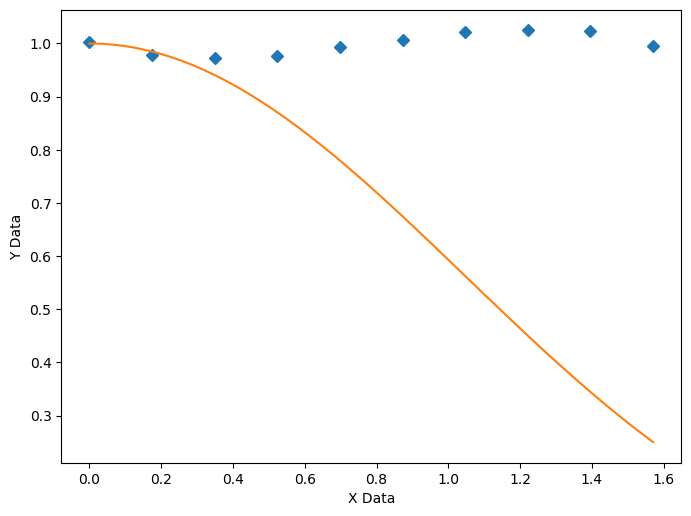

In [18]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias22


def func(x, gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f2(x,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [19]:
filenames = glob('/home/mc/Desktop/DatosGerardo2/22/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias1=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias1=np.append(Coincidencias1,promedio)

coincidencias1=Coincidencias1[2:]

In [20]:
filenames = glob('/home/gsuarez/Desktop/DatosGerardo2/12/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias2=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias2=np.append(Coincidencias2,promedio)
coincidencias2=Coincidencias2[4:]

In [21]:
total=Coincidencias1[1]+Coincidencias2[0]
total

IndexError: index 1 is out of bounds for axis 0 with size 0

In [22]:
coincidencias1=coincidencias1/total
coincidencias2=coincidencias2/total

NameError: name 'total' is not defined

In [58]:
theta1,theta2=symbols('theta1 theta2',real=True)
pabs,pd1,pd2,K=N_Interferomemer(2,1)
pd1=simplify(pd1.subs({K[1]:theta1,K[2]:theta2,beta:cos(theta)}))
f1 = lambdify([theta, theta1,theta2,gamma1, gamma2], pd1)
pd1

sin(theta1)**2*cos(theta)**2*cos(theta2)**2 + 2*sin(theta1)*sin(theta2)*cos(theta)*cos(theta1)*cos(theta2)*cos(gamma1 - gamma2) + sin(theta2)**2*cos(theta1)**2

Parameters [0.76818044 1.58834712 0.88430434 0.88425507]
RMSE: 0.0074531884300869135
R-squared: 0.3828977310426299


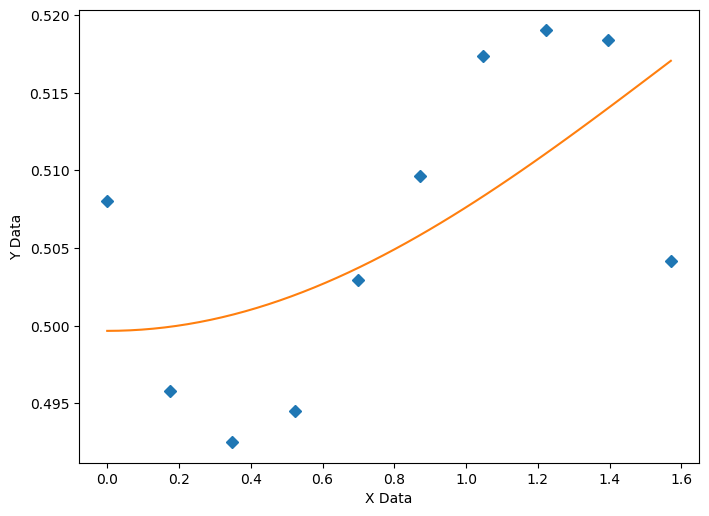

In [61]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias1


def func(x, theta1,theta2,gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f1(x,theta1,theta2,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [44]:
theta1,theta2=symbols('theta1 theta2',real=True)
pabs,pd1,pd2,K=N_Interferomemer(2,1)
pd2=simplify(pd2.subs({K[1]:theta1,K[2]:theta2,beta:cos(theta)}))
f2 = lambdify([theta, theta1,theta2,gamma1, gamma2], pd2)
pd2

sin(theta1)**2*sin(theta2)**2*cos(theta)**2 - 2*sin(theta1)*sin(theta2)*cos(theta)*cos(theta1)*cos(theta2)*cos(gamma1 - gamma2) + cos(theta1)**2*cos(theta2)**2

Parameters [  0.76577823   0.6722034  144.65993818 145.96160826]
RMSE: 0.009835739887514369
R-squared: 0.8956878906694888


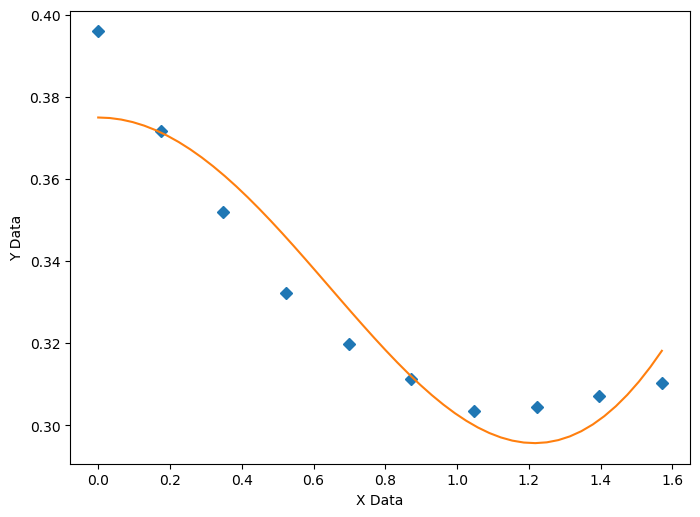

In [53]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias2


def func(x, theta1,theta2,gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f2(x,theta1,theta2,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.errorbar(,)
    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

# O alternativamente

In [40]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo/12/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias2=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias2=np.append(Coincidencias2,promedio)
coincidencias2=Coincidencias2[4:]

In [41]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo/22/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias1=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias1=np.append(Coincidencias1,promedio)

coincidencias1=Coincidencias1[2:]

In [42]:
tata=coincidencias1+coincidencias2
tata

array([], dtype=float64)

In [43]:
for i in range(len(tata)):
    coincidencias1[i]=coincidencias1[i]/tata[i]
    coincidencias2[i]=coincidencias2[i]/tata[i]

In [76]:
coincidencias1

array([0.56199721, 0.57159373, 0.58330339, 0.59812597, 0.61126617,
       0.62083119, 0.6302444 , 0.63025208, 0.62789901, 0.61911541])

In [77]:
coincidencias2

array([0.43800279, 0.42840627, 0.41669661, 0.40187403, 0.38873383,
       0.37916881, 0.3697556 , 0.36974792, 0.37210099, 0.38088459])

Parameters [-2.02498424e+02 -2.04501333e+02  1.49676847e-01]
RMSE: 0.009541277582987425
R-squared: 0.8422122329183647


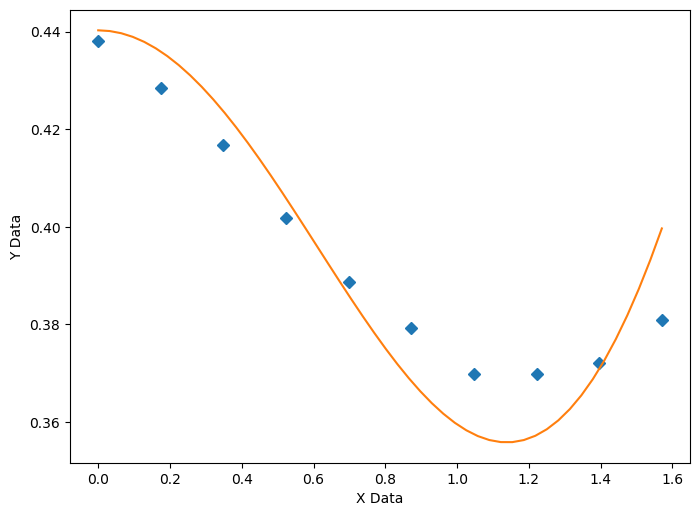

In [83]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias2


def func(x, gamma1, gamma2,off): # Sigmoid A With Offset from zunzun.com
    return  f(x,gamma1,gamma2)+off


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

Parameters [1.14512489 0.27806263 0.43154044]
RMSE: 0.03685656267315466
R-squared: -1.3544524725846658


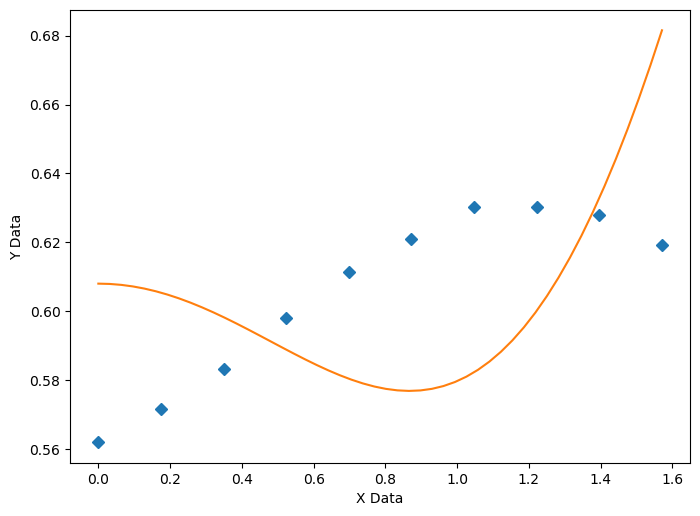

In [84]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias1


def func(x, gamma1, gamma2,off): # Sigmoid A With Offset from zunzun.com
    return  f2(x,gamma1,gamma2)+off


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [55]:
cos(0.76577823)**2

0.519614898763597

In [57]:
cos(0.6722034)**2

0.612230324421004